In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Definition ##

In [2]:
# VIDEO: Two Equivalent Definitions
from IPython.display import YouTubeVideo

YouTubeVideo('jhKL5nVe0Mk')

The *expectation* of a random variable $X$, denoted $E(X)$, is the average of the possible values of $X$ weighted by their probabilities. This can be calculated in two equivalent ways.

**On the domain of $X$:**

$$
E(X) = \sum_{\omega \in \Omega} X(\omega)P(\omega)
$$

**On the range of $X$:**

$$
E(X) = \sum_{\text{all }x} xP(X=x)
$$

```{admonition} Quick Check
Let $X$ be the maximum of two draws at random without replacement from $\{ 1, 2, 3 \}$. 

(a) For the outcome $\omega = (3, 1)$ of Draw 1 followed by Draw 2, what is the value of $X(\omega)P(\omega)$?

(b) Show how to calculate $E(X)$ on the range of $X$.

```

```{admonition} Answer
:class: dropdown
(a) $3\cdot\frac{1}{6}$

(b) $2 \cdot \frac{2}{6} + 3 \cdot \frac{4}{6}$

```

**Technical Note:** If $X$ has finitely many possible values, the sums above are always well defined and finite. If $X$ can have countably many values (that is, values indexed by 1, 2, 3, $\ldots$), then more care is needed to make sure that the formulas result in a well defined number. We will deal with that issue shortly; for now, assume that the sum is well defined.

Assuming the sums are well defined, it is straightforward to show that these two formulas give the same answer. One way to show it is to group terms in the first sum by the distinct values of $X(\omega)$ over all the different outcomes $\omega$.

The second formula is often given as "the" definition of expectation, but the first can be helpful for understanding properties of expectation. In particular, it shows that if two random variables have the same distribution, then they also have the same expectation.

### Center of Gravity ###
Suppose $X$ has the distribution given below.

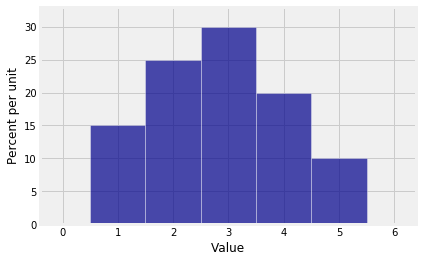

In [3]:
x = np.arange(1, 6)
probs = make_array(0.15, 0.25, 0.3, 0.2, 0.1)
example_dist = Table().values(x).probabilities(probs)
Plot(example_dist)

Then by the formula on the range of $X$, we have $E(X) = 2.85$.

In [4]:
ev_X = sum(x*probs)
ev_X

2.8499999999999996

You can also call the `prob140` function `ev` to calculate $E(X)$:

In [5]:
example_dist.ev()

2.8500000000000005

Expectation is often also called *expected value*, hence the name of the function and also our name `ev_X`. But notice that **the "expected value" need not be a possible value of the random variable**. This random variable $X$ can't be 2.85.

But then what does the expected value represent? To see this, first visualize $E(X)$ using the `show_ev=True` option to `Plot`.

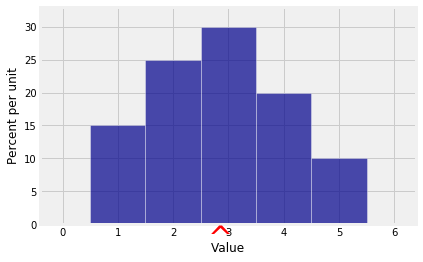

In [6]:
Plot(example_dist, show_ev=True)

If you have studied some physics, you will recognize that the formula we used for the expectation is the same as the formula for the center of gravity of a system in which weights equal to the corresponding probabilities hang from each possible value 1, 2, 3, 4, and 5. 

So suppose the histogram is made of cardboard or some rigid material, and imagine trying to balance it on the tip of a pencil held somewhere on the horizontal axis. You'll have to hold the pencil at 2.85 for the figure to balance.

The expectation is the *center* of the distribution in this physical sense: it is the *center of gravity* or *center of mass* of the distribution.

```{admonition} Quick Check
True or False: If $X \stackrel{d}{=} Y$ then $E(X) = E(Y)$.

```

```{admonition} Answer
:class: dropdown
True

```

### Long Run Average ###
You can also think of expectation as the *long run average* value of the random variable when you generate the variable over and over again independently and under identical conditions. The `sample_from_dist` method applied to `prob140` distribution objects allows you to do just that. It samples at random with replacement from the distribution and returns an array of sampled values. The argument is the sample size.

You can use the `emp_dist` method to convert the array of simulated values to a distribution object which you can then use with `Plot` and other `prob140` functions. The `show_ave=True` option of `Plot` displays the average of the simulated values. 

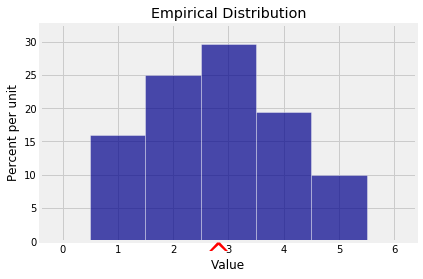

In [7]:
simulated_X = example_dist.sample_from_dist(10000)
emp_dist_X = emp_dist(simulated_X)
Plot(emp_dist_X, show_ave=True)
plt.title('Empirical Distribution');

The average of the 10,000 simulated values of $X$ is very close to $E(X)$ but not exactly equal.

In [8]:
np.mean(simulated_X)

2.8235

This is because of what you can see in the empirical histogram: it looks very much like the probability histogram of $X$. About 15% of the simulated values are 1, about 20% are 2's, and so on, so the average is very close to 2.85. 

The similarity of the two histograms is because of the Law of Averages that you saw in Data 8 and that we will establish formally in this course.

In [9]:
# VIDEO: Existence

YouTubeVideo('9gjBI8SMQis')

### Existence ###
If $X$ has countably many values, then the sums used to define expectation are infinite and hence are limits of partial sums. But not all sequences of partial sums have limits, and so not all random variables have expectations. Indeed, $E(X)$ is only well defined when the sum is *absolutely convergent*:

$$
E(X) = \sum_{\text{all }x} xP(X=x) ~~~~ \text{provided }
\sum_{\text{all }x} |x|P(X=x) < \infty
$$

That's a bit technical for this level of course, and you will almost never have to deal with non-existent expectations in Prob140. Just keep in mind that expectation isn't always finite or even well defined. 

Here is an example in which you can see that the expectation can't be finite. First notice that the sequence $1/2^n, ~n = 1, 2, 3, \ldots $ is a probability distribution: by summing the geometric series you get 1.

$$
\sum_{k=1}^\infty (\frac{1}{2^n}) ~ = ~ \frac{1}{2} \cdot \frac{1}{1 - \frac{1}{2}} ~ = ~ 1
$$

Now suppose the random variable $X$ has values $2, 4, 8, 16 \ldots$ so that $P(X = 2^n) = 1/2^n$ for $n = 1, 2, 3, \ldots $. Then for every possible value $x$, the product $xP(X=x) = 1$. If you try to add infinitely many 1's, the only sensible answer is infinity. 

This problem with expectation happens when the distribution has "mass drifting off to infinity" at a rate that makes it impossible to balance the probability histogram anywhere on the horizontal axis. 

```{admonition} Quick Check
Let $X$ be the number of spots on one roll of a die. Say whether each of the following statements is True or False.

(a) $E(X)$ does not exist because $X$ can't be $3.5$.

(b) If you roll a die repeatedly, the average number of spots per roll is likely to be about 3.5.

```

```{admonition} Answer
:class: dropdown
(a) False; $E(X) = 3.5$

(b) True

```